In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Design a (simple) lexicon-lookup approach

In [7]:
# Read  merged_lexicon
merged_path = './merged_lexicon.csv'
merged = pd.read_csv(merged_path)  

# Keep only the hate words
merged = merged[merged['hate-label'] == 1]

# Read the olid-test
test_path = './Data/olid-test.csv'
test = pd.read_csv(test_path)  


In [8]:
# The string you want to lookup for
target_string = 'hated'
# target_string = 'Dump'


# Check if 'target_string' is in 'column_name' and get True or False
result = merged['unit'].str.contains(target_string).any()

print(result)

True


# Run this approach with the 4 lexicons

In [9]:
def lexicon_lookup_and_evaluate(text_column, labels_column, lexicon, column_name=None, name=None):
    """
    Perform lexicon-based hate speech identification and evaluate the results.

    Parameters:
        text_column (pd.Series): The column containing the input text to classify.
        labels_column (pd.Series): The column containing the true labels (0 for non-hate, 1 for hate).
        lexicon (pd.DataFrame): The lexicon containing hate speech terms and labels.
        column_name (str): The column name in the lexicon DataFrame.
        name (str): Name to be added to Confusion Matrix.

    Returns:
        pd.DataFrame: A DataFrame containing the original text, true labels, predicted labels,
                      detected tokens. and plot confusion matrix. and print classification report.
    """
    # Create a DataFrame to store results
    results_df = pd.DataFrame({'Text': text_column, 'True_Labels': labels_column})

    # Define a function for lexicon-based hate speech identification
    def lexicon_lookup(text, lexicon):
        tokens = text.lower().split()  # Convert to lowercase for case-insensitive matching
        detected_tokens = []  # To store tokens detected as hate speech
        for token in tokens:
            if token in lexicon[column_name].values:
                detected_tokens.append(token)
        if detected_tokens:
            return 1, ', '.join(detected_tokens)  # Hate speech detected and list of detected tokens
        else:
            return 0, ''  # Non-hate speech and empty token list

    # Apply the lexicon-lookup approach to the text data
    results_df['Predicted_Labels'], results_df['Detected_Tokens'] = zip(*text_column.apply(lambda x: lexicon_lookup(x, lexicon)))

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(results_df['True_Labels'], results_df['Predicted_Labels'])

    # Create a confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Non-Hate', 'Hate'],
                yticklabels=['Non-Hate', 'Hate'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of ' + name)
    plt.show()

    # Generate a classification report
    report = classification_report(results_df['True_Labels'], results_df['Predicted_Labels'], target_names=['Non-Hate', 'Hate'])

    # Print the classification report
    print("Classification Report for " + name + ":\n")
    print(report)

    return results_df


# Merged lexicon

In [10]:
# Load the merged lexicon 
merged_lexicon = pd.read_csv('./merged_lexicon.csv')
# Drop instances where 'hate-label' is equal to 0 no hate
merged_lexicon = merged_lexicon[merged_lexicon['hate-label'] != 0]

# Load the OLID test dataset
test_data = pd.read_csv('./Data/olid-test.csv')


In [11]:
df = lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], merged_lexicon, column_name='unit', name="Merged lexicon")
df.head(10)

Classification Report for Merged lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.82      0.56      0.66       620
        Hate       0.37      0.68      0.48       240

    accuracy                           0.59       860
   macro avg       0.59      0.62      0.57       860
weighted avg       0.69      0.59      0.61       860



Text  \
0                              #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL   
1                                                                                                                                                                    #ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.   
2                                                                       #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER    @USER @USER @USER @USER   #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER  First, it reduces the ca URL   
3                                                                                                                                        #Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL   
4                                                                                                                                                                                 #NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL   
5                                                                                                                                                                                                                                           . . . What the fuck did he do this time?   
6  #RAP is a form of ART! Used to express yourself freely. It does not gv the green light or excuse the behavior of acting like an animal! She is not in the streets of the BX where violence is a way of living. Elevate yourself boo and get on @USER level for longevity! #QUEEN👑   
7                                                                                                                                                                                             @USER Do you get the feeling he is kissing @USER behind so he can humiliate him later?   
8                                                                                                                                                                                                  5 Tips to Enhance Audience Connection on Facebook URL @USER #socialmedia #smm URL   
9                                                                                                                                                                                                           #BiggBossTamil janani won the task. She is going to first final list👏👏👏👏   

   True_Labels  Predicted_Labels        Detected_Tokens  
0            1                 0                         
1            0                 1                  hated  
2            0                 0                         
3            0                 0                         
4            1                 0                         
5            1                 1                     do  
6            0                 1        green, violence  
7            1                 1  do, behind, humiliate  
8            0                 0                         
9            0                 0

# Expanded lexicon

In [12]:
# Define the path to the Expanded lexicon file
path = r"../Assignment 3 - Group 11/Data/lexicon-of-abusive-words-master/Lexicons/"

# Read the lexicon
featur_base_lexicon_path = path + "expandedLexicon.txt"
df_featur_base_lexicon = pd.read_csv(featur_base_lexicon_path, sep='\t', header=None, names=["word", "label"], encoding="utf-8")
df_featur_base_lexicon.head()
# Remove the POS from the words 
df_featur_base_lexicon['word'] = df_featur_base_lexicon['word'].str.replace(r'_[a-zA-Z]+$', '', regex=True)

# Drop instances where 'label' is less than 0. these word are not hate words
df_featur_base_lexicon = df_featur_base_lexicon[df_featur_base_lexicon['label'] > 0]
df_featur_base_lexicon.head()

word     label
0    horrible  3.679601
1  disgusting  3.493682
2       moron  3.469677
3     bastard  3.399238
4      stupid  3.323882

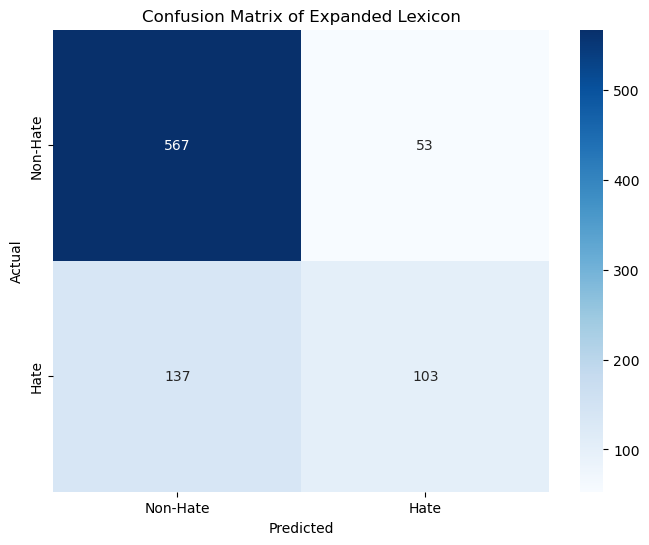

Classification Report for Expanded Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.81      0.91      0.86       620
        Hate       0.66      0.43      0.52       240

    accuracy                           0.78       860
   macro avg       0.73      0.67      0.69       860
weighted avg       0.76      0.78      0.76       860



Text  \
0                                                                         #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL   
1                                                                                                                                                                                                               #ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.   
2                                                                                                                  #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER    @USER @USER @USER @USER   #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER  First, it reduces the ca URL   
3                                                                                                                                                                                   #Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL   
4                                                                                                                                                                                                                            #NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL   
5                                                                                                                                                                                                                                                                                      . . . What the fuck did he do this time?   
6                                             #RAP is a form of ART! Used to express yourself freely. It does not gv the green light or excuse the behavior of acting like an animal! She is not in the streets of the BX where violence is a way of living. Elevate yourself boo and get on @USER level for longevity! #QUEEN👑   
7                                                                                                                                                                                                                                        @USER Do you get the feeling he is kissing @USER behind so he can humiliate him later?   
8                                                                                                                                                                                                                                             5 Tips to Enhance Audience Connection on Facebook URL @USER #socialmedia #smm URL   
9                                                                                                                                                                                                                                                      #BiggBossTamil janani won the task. She is going to first final list👏👏👏👏   
10                                                                                                                                                                                                                                                               #Conservatives - the party of low taxation 😂 #Tories #Tory URL   
11                                                           𝓒-𝓒𝓮𝓭𝓻𝓪𝓷..  The Nord cannot make a single move, but he is fully aware of what is happening. A chill comes down his spine as a ghostly, rather. . . calm female voice called for him from a corner of the room.  Before he even has time to /attempt/ a response, +   
12                                                                                                                  

In [14]:
df2 = lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_featur_base_lexicon , column_name='word', name = "Expanded Lexicon")
df2

# hurtlex_EN lexicon

In [9]:
# Define the path to the hurtlex_EN lexicon file
path= r"../Assignment 3 - Group 11/Data/"
hurtlex_EN = path+"hurtlex_EN.tsv"
# Read the TSV file into a DataFrame
df_hurtlex_EN = pd.read_csv(hurtlex_EN, sep='\t', encoding='utf-8')

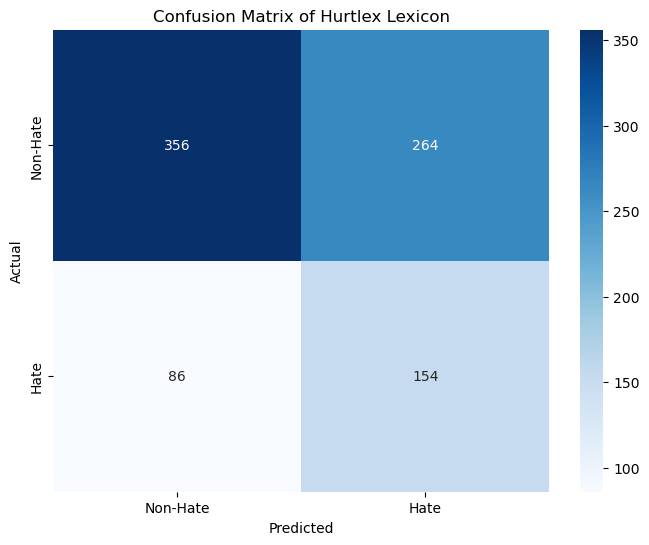

Classification Report for Hurtlex Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.81      0.57      0.67       620
        Hate       0.37      0.64      0.47       240

    accuracy                           0.59       860
   macro avg       0.59      0.61      0.57       860
weighted avg       0.68      0.59      0.61       860



Text  \
0                              #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL   
1                                                                                                                                                                    #ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.   
2                                                                       #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER    @USER @USER @USER @USER   #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER  First, it reduces the ca URL   
3                                                                                                                                        #Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL   
4                                                                                                                                                                                 #NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL   
5                                                                                                                                                                                                                                           . . . What the fuck did he do this time?   
6  #RAP is a form of ART! Used to express yourself freely. It does not gv the green light or excuse the behavior of acting like an animal! She is not in the streets of the BX where violence is a way of living. Elevate yourself boo and get on @USER level for longevity! #QUEEN👑   
7                                                                                                                                                                                             @USER Do you get the feeling he is kissing @USER behind so he can humiliate him later?   
8                                                                                                                                                                                                  5 Tips to Enhance Audience Connection on Facebook URL @USER #socialmedia #smm URL   
9                                                                                                                                                                                                           #BiggBossTamil janani won the task. She is going to first final list👏👏👏👏   

   True_Labels  Predicted_Labels  Detected_Tokens  
0            1                 0                   
1            0                 0                   
2            0                 0                   
3            0                 0                   
4            1                 0                   
5            1                 1         fuck, do  
6            0                 1  green, violence  
7            1                 1  do, behind, can  
8            0                 0                   
9            0                 0

In [10]:
df3 = lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_hurtlex_EN , column_name='lemma', name = "Hurtlex Lexicon")
df3.head(10)

# MOL lexicon

In [11]:
# Define the path to the mol lexicon file
path= r"../Assignment 3 - Group 11/Data/"
mol =path+"mol.csv"

# Read the lexicon file
df_mol = pd.read_csv(mol)

# Drop rows where en-hate-label is equal to not 0. these are not hate words
df_mol = df_mol[df_mol['en-hate-label'] != '0']

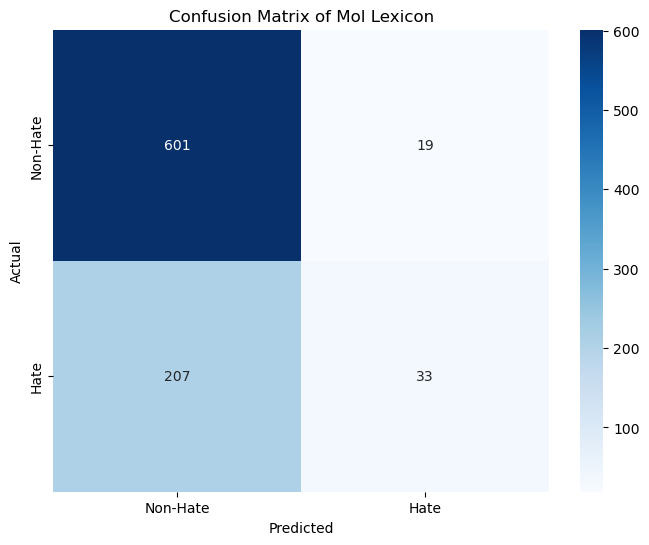

Classification Report for Mol Lexicon:

              precision    recall  f1-score   support

    Non-Hate       0.74      0.97      0.84       620
        Hate       0.63      0.14      0.23       240

    accuracy                           0.74       860
   macro avg       0.69      0.55      0.53       860
weighted avg       0.71      0.74      0.67       860



Text  \
0                              #WhoIsQ #WheresTheServer #DumpNike #DECLASFISA Democrats Support Antifa, Muslim Brotherhood, MS13, ISIS, Pedophilia, Child Trafficking, Taxpayer Funded Abortion’s, Election Fraud, Sedition And Treason!!! #LockThemAllUp #WWG1WGA #QAnon ⁦@USER URL   
1                                                                                                                                                                    #ConstitutionDay is revered by Conservatives, hated by Progressives/Socialist/Democrats that want to change it.   
2                                                                       #FOXNews #NRA #MAGA #POTUS #TRUMP #2ndAmendment #RNC #USMC #veterans @USER    @USER @USER @USER @USER   #fakereporting #THESWAMP #dnc #liberals @USER @USER #fakeoutrage @USER  First, it reduces the ca URL   
3                                                                                                                                        #Watching #Boomer getting the news that she is still up for parole always makes me smile. #Wentworth Finale...@USER is such a treasure. URL   
4                                                                                                                                                                                 #NoPasaran: Unity demo to oppose the far-right in #London – #antifa #Oct13 — Enough is Enough! URL   
5                                                                                                                                                                                                                                           . . . What the fuck did he do this time?   
6  #RAP is a form of ART! Used to express yourself freely. It does not gv the green light or excuse the behavior of acting like an animal! She is not in the streets of the BX where violence is a way of living. Elevate yourself boo and get on @USER level for longevity! #QUEEN👑   
7                                                                                                                                                                                             @USER Do you get the feeling he is kissing @USER behind so he can humiliate him later?   
8                                                                                                                                                                                                  5 Tips to Enhance Audience Connection on Facebook URL @USER #socialmedia #smm URL   
9                                                                                                                                                                                                           #BiggBossTamil janani won the task. She is going to first final list👏👏👏👏   

   True_Labels  Predicted_Labels Detected_Tokens  
0            1                 0                  
1            0                 0                  
2            0                 0                  
3            0                 0                  
4            1                 0                  
5            1                 0                  
6            0                 0                  
7            1                 0                  
8            0                 0                  
9            0                 0

In [12]:
df4 = lexicon_lookup_and_evaluate(test_data['text'], test_data['labels'], df_mol , column_name='en-american-english', name = "Mol Lexicon")
df4.head(10)